In [14]:
def closest_colour(requested_colour):
    """
    Finds the closest color.
    """
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        r_d = (r_c - requested_colour[0]) ** 2
        g_d = (g_c - requested_colour[1]) ** 2
        b_d = (b_c - requested_colour[2]) ** 2
        min_colours[(r_d + g_d + b_d)] = name
    return min_colours[min(min_colours.keys())]


def get_colour_name(requested_colour):
    """
    Gives the color name, if not found returns the closest color.
    """
    try:
        closest_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
    return closest_name


In [11]:
#Supporting Functions for Jupyter Notebook
def display_image(filename,length_box=60,width_box=30):
    if type(filename) == np.ndarray:
        image = filename
    else:
        image = cv2.imread(filename)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(length_box,width_box))
    plt.imshow(image,cmap = "gray")
    
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)


In [4]:
#conda install -c conda-forge webcolors
#conda install -c conda-forge opencv 

In [9]:
import cv2
from sklearn.cluster import MiniBatchKMeans
import webcolors
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def dominant_colors(image, clusters=10):
    """
    Finds the dominant colors.
    """
    if type(image) == str:
        img = cv2.imread(image)
    else:
        img = image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((img.shape[0] * img.shape[1], 3))
    kmeans = MiniBatchKMeans(n_clusters=clusters)
    kmeans.fit(img)
    colors = kmeans.cluster_centers_
    return colors.astype(int)


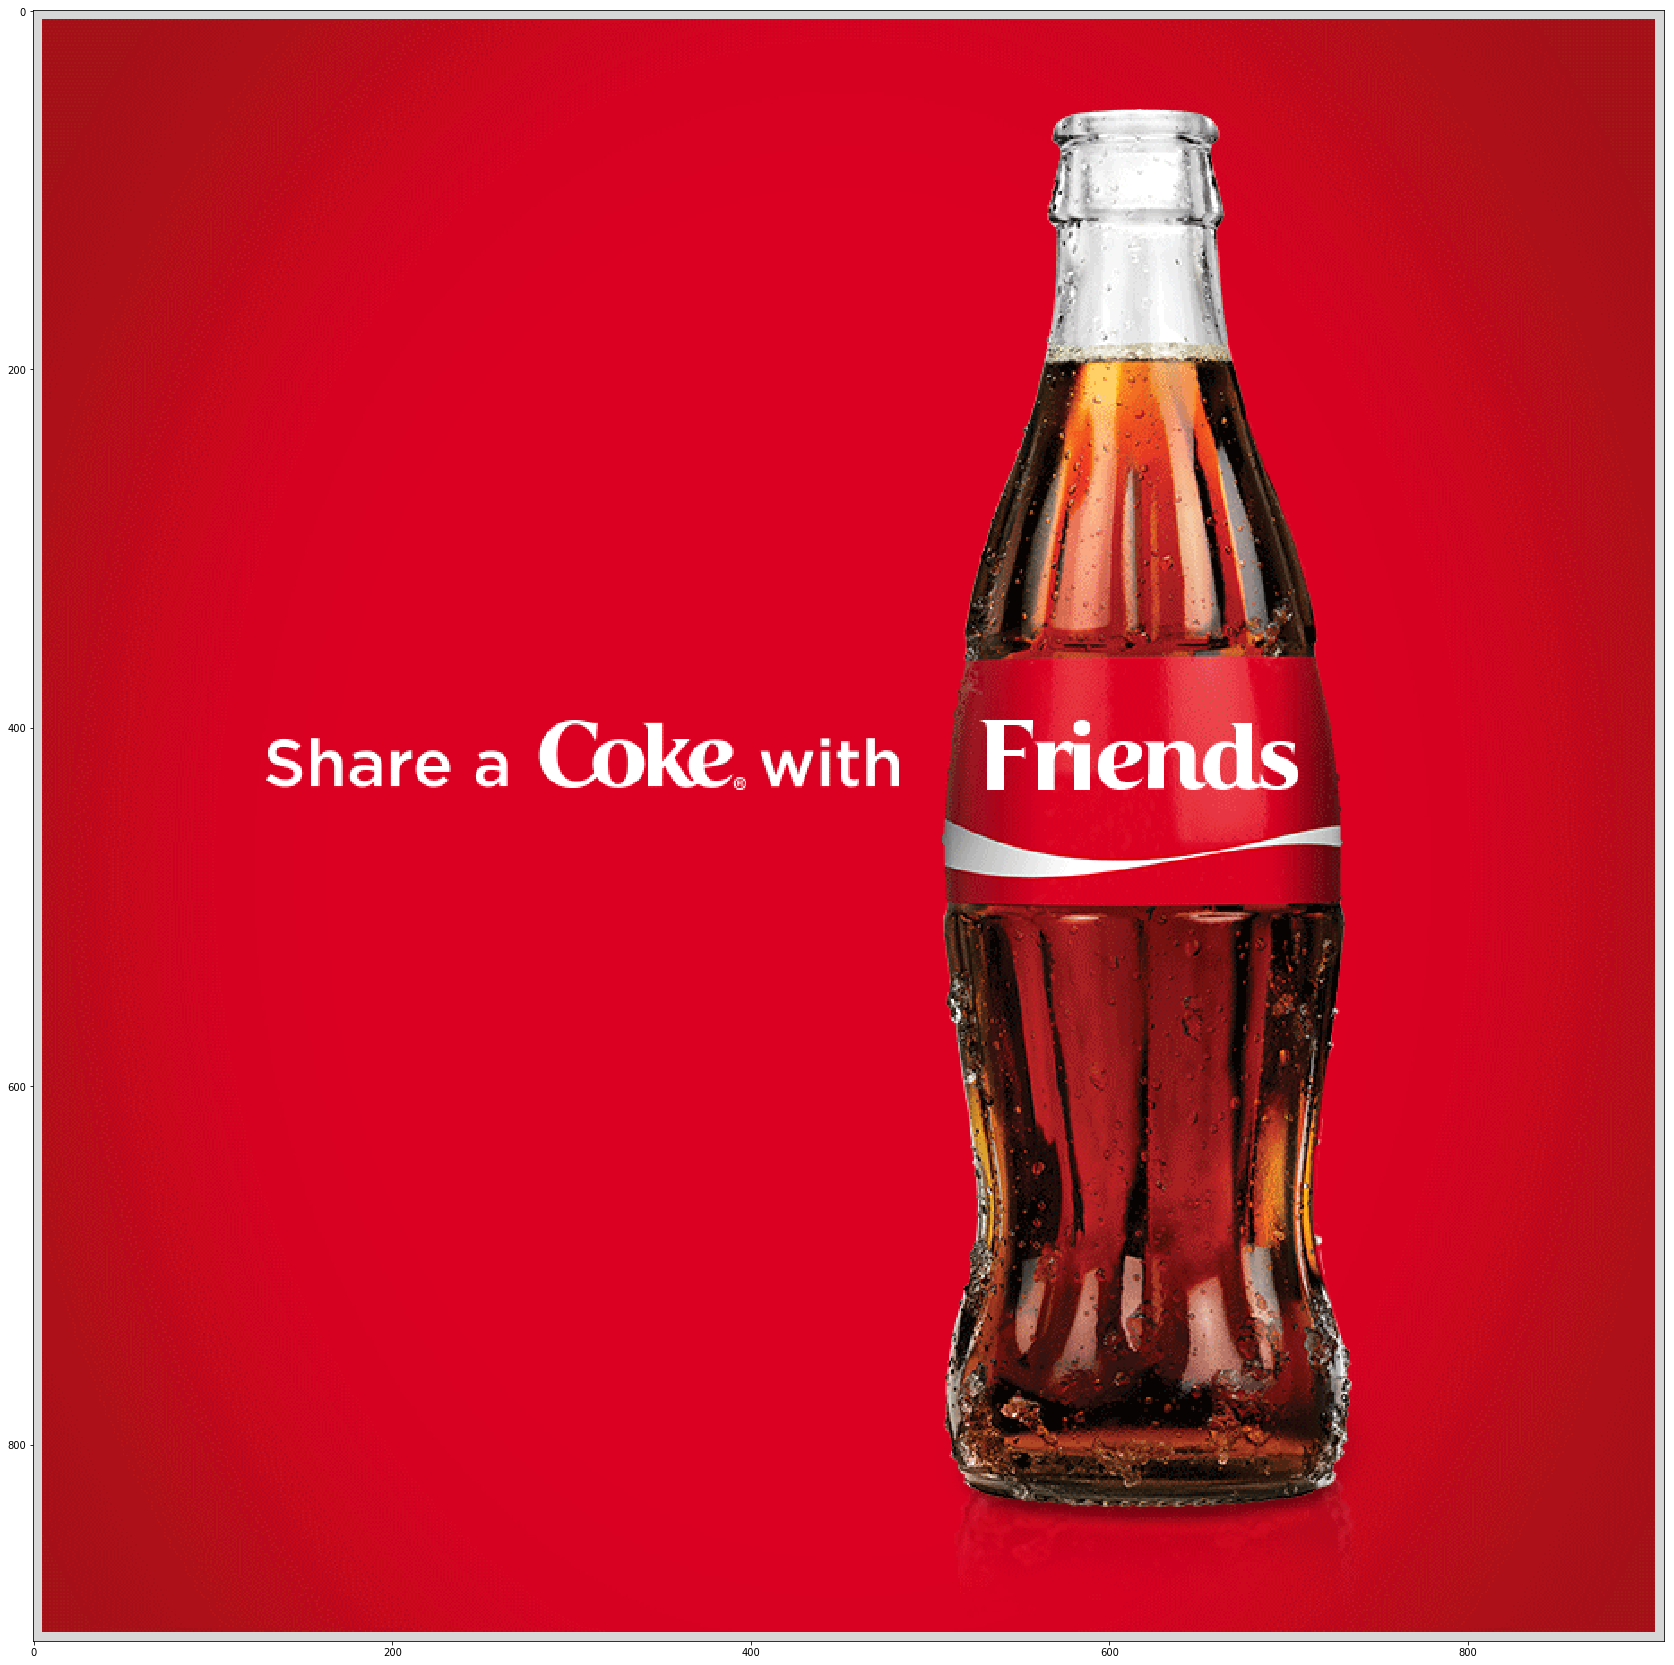

In [12]:
display_image("Coca-Cola-advertisement.png")

In [20]:
rgb = dominant_colors("Coca-Cola-advertisement.png",clusters=1)

In [21]:
for i in rgb:
    color_names = get_colour_name(i)
    print(color_names)

firebrick
